# Test Various CNN architectures on the layer identification task


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from Classifier_models import CNN1D_Small, CNN1D_Large, train_model, identify_device

## Import Data 

In [2]:
device = identify_device()

Using device: cuda


In [3]:
# Load the dataset with weights_only=False
data = torch.load("Synthetic_data_60k.pt", weights_only=False)

# Extract components
synthetic_data = data["synthetic_data"]
material_params = data["material_params"]
num_layers = data["num_layers"]

print("Dataset loaded successfully!")
print(f"Number of samples: {len(synthetic_data)}")
print(f"Shape of synthetic_data: {synthetic_data.shape}")
print(f"Shape of num_layers: {num_layers.shape}")
print(f"Example number of layers: {num_layers[:10]}")

num_classes = int(max(num_layers)) # class labels start at 1 not 0.

Dataset loaded successfully!
Number of samples: 60000
Shape of synthetic_data: torch.Size([60000, 1024])
Shape of num_layers: torch.Size([60000])
Example number of layers: tensor([3, 3, 2, 1, 3, 2, 3, 1, 1, 3])


In [4]:
# Adjust labels for training (CrossEntropyLoss expects 0-based class labels)
num_layers_adjusted = num_layers - 1  # Convert labels from 1–5 → 0–4

# Ensure shapes are as expected
print("synthetic_data shape (after unsqueeze):", synthetic_data.unsqueeze(1).shape)
print("num_layers (original):", num_layers[:10])
print("num_layers_adjusted (for training):", num_layers_adjusted[:10])


synthetic_data shape (after unsqueeze): torch.Size([60000, 1, 1024])
num_layers (original): tensor([3, 3, 2, 1, 3, 2, 3, 1, 1, 3])
num_layers_adjusted (for training): tensor([2, 2, 1, 0, 2, 1, 2, 0, 0, 2])


In [5]:
num_classes = int(num_layers_adjusted.max().item()) + 1  # e.g., 5 if max label is 4
batch_size = 1024

# Unsqueeze to add channel dimension for Conv1D input: [B, 1, 1024]
synthetic_data = synthetic_data.unsqueeze(1)  # [100, 1, 1024]

# Create TensorDataset with adjusted labels
train_dataset = TensorDataset(synthetic_data, num_layers_adjusted)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## Train and Test Small CNN

In [6]:
# Initialize the model, criterion, and optimizer
model = CNN1D_Small(input_channels=1, num_classes=num_classes).to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Optional: Print shapes and label stats for sanity check
print("Data shape:", synthetic_data.shape)
print("Label range:", num_layers_adjusted.min().item(), "to", num_layers_adjusted.max().item())
print("Number of classes:", num_classes)

Data shape: torch.Size([60000, 1, 1024])
Label range: 0 to 2
Number of classes: 3


Epoch 1/200: 100%|██████████| 59/59 [00:01<00:00, 38.90batch/s, loss=1.1]


Epoch [1/200], Loss: 1.0987


Epoch 2/200: 100%|██████████| 59/59 [00:01<00:00, 50.27batch/s, loss=1.1]


Epoch [2/200], Loss: 1.0985


Epoch 3/200: 100%|██████████| 59/59 [00:01<00:00, 45.15batch/s, loss=1.1]


Epoch [3/200], Loss: 1.0983


Epoch 4/200: 100%|██████████| 59/59 [00:01<00:00, 50.71batch/s, loss=1.1]


Epoch [4/200], Loss: 1.0971


Epoch 5/200: 100%|██████████| 59/59 [00:01<00:00, 45.09batch/s, loss=1.09]


Epoch [5/200], Loss: 1.0925


Epoch 6/200: 100%|██████████| 59/59 [00:01<00:00, 50.88batch/s, loss=1.08]


Epoch [6/200], Loss: 1.0765


Epoch 7/200: 100%|██████████| 59/59 [00:01<00:00, 44.52batch/s, loss=1.04]


Epoch [7/200], Loss: 1.0358


Epoch 8/200: 100%|██████████| 59/59 [00:01<00:00, 50.71batch/s, loss=0.984]


Epoch [8/200], Loss: 0.9841


Epoch 9/200: 100%|██████████| 59/59 [00:01<00:00, 45.42batch/s, loss=0.952]


Epoch [9/200], Loss: 0.9523


Epoch 10/200: 100%|██████████| 59/59 [00:01<00:00, 51.09batch/s, loss=0.938]


Epoch [10/200], Loss: 0.9384


Epoch 11/200: 100%|██████████| 59/59 [00:01<00:00, 45.35batch/s, loss=0.93] 


Epoch [11/200], Loss: 0.9298


Epoch 12/200: 100%|██████████| 59/59 [00:01<00:00, 51.23batch/s, loss=0.923]


Epoch [12/200], Loss: 0.9231


Epoch 13/200: 100%|██████████| 59/59 [00:01<00:00, 44.77batch/s, loss=0.919]


Epoch [13/200], Loss: 0.9189


Epoch 14/200: 100%|██████████| 59/59 [00:01<00:00, 50.89batch/s, loss=0.915]


Epoch [14/200], Loss: 0.9149


Epoch 15/200: 100%|██████████| 59/59 [00:01<00:00, 44.80batch/s, loss=0.912]


Epoch [15/200], Loss: 0.9116


Epoch 16/200: 100%|██████████| 59/59 [00:01<00:00, 51.30batch/s, loss=0.907]


Epoch [16/200], Loss: 0.9075


Epoch 17/200: 100%|██████████| 59/59 [00:01<00:00, 44.82batch/s, loss=0.905]


Epoch [17/200], Loss: 0.9054


Epoch 18/200: 100%|██████████| 59/59 [00:01<00:00, 50.55batch/s, loss=0.903]


Epoch [18/200], Loss: 0.9031


Epoch 19/200: 100%|██████████| 59/59 [00:01<00:00, 45.35batch/s, loss=0.9]  


Epoch [19/200], Loss: 0.9001


Epoch 20/200: 100%|██████████| 59/59 [00:01<00:00, 49.74batch/s, loss=0.898]


Epoch [20/200], Loss: 0.8983


Epoch 21/200: 100%|██████████| 59/59 [00:01<00:00, 45.22batch/s, loss=0.895]


Epoch [21/200], Loss: 0.8950


Epoch 22/200: 100%|██████████| 59/59 [00:01<00:00, 50.10batch/s, loss=0.893]


Epoch [22/200], Loss: 0.8931


Epoch 23/200: 100%|██████████| 59/59 [00:01<00:00, 45.59batch/s, loss=0.891]


Epoch [23/200], Loss: 0.8914


Epoch 24/200: 100%|██████████| 59/59 [00:01<00:00, 50.30batch/s, loss=0.889]


Epoch [24/200], Loss: 0.8889


Epoch 25/200: 100%|██████████| 59/59 [00:01<00:00, 45.02batch/s, loss=0.888]


Epoch [25/200], Loss: 0.8876


Epoch 26/200: 100%|██████████| 59/59 [00:01<00:00, 50.94batch/s, loss=0.887]


Epoch [26/200], Loss: 0.8872


Epoch 27/200: 100%|██████████| 59/59 [00:01<00:00, 45.34batch/s, loss=0.883]


Epoch [27/200], Loss: 0.8833


Epoch 28/200: 100%|██████████| 59/59 [00:01<00:00, 50.62batch/s, loss=0.882]


Epoch [28/200], Loss: 0.8821


Epoch 29/200: 100%|██████████| 59/59 [00:01<00:00, 45.39batch/s, loss=0.878]


Epoch [29/200], Loss: 0.8783


Epoch 30/200: 100%|██████████| 59/59 [00:01<00:00, 50.71batch/s, loss=0.876]


Epoch [30/200], Loss: 0.8764


Epoch 31/200: 100%|██████████| 59/59 [00:01<00:00, 44.94batch/s, loss=0.872]


Epoch [31/200], Loss: 0.8720


Epoch 32/200: 100%|██████████| 59/59 [00:01<00:00, 51.10batch/s, loss=0.869]


Epoch [32/200], Loss: 0.8694


Epoch 33/200: 100%|██████████| 59/59 [00:01<00:00, 50.44batch/s, loss=0.866]


Epoch [33/200], Loss: 0.8664


Epoch 34/200: 100%|██████████| 59/59 [00:01<00:00, 45.43batch/s, loss=0.862]


Epoch [34/200], Loss: 0.8624


Epoch 35/200: 100%|██████████| 59/59 [00:01<00:00, 49.74batch/s, loss=0.857]


Epoch [35/200], Loss: 0.8571


Epoch 36/200: 100%|██████████| 59/59 [00:01<00:00, 45.43batch/s, loss=0.854]


Epoch [36/200], Loss: 0.8538


Epoch 37/200: 100%|██████████| 59/59 [00:01<00:00, 50.21batch/s, loss=0.85] 


Epoch [37/200], Loss: 0.8496


Epoch 38/200: 100%|██████████| 59/59 [00:01<00:00, 44.54batch/s, loss=0.844]


Epoch [38/200], Loss: 0.8443


Epoch 39/200: 100%|██████████| 59/59 [00:01<00:00, 50.51batch/s, loss=0.841]


Epoch [39/200], Loss: 0.8413


Epoch 40/200: 100%|██████████| 59/59 [00:01<00:00, 45.35batch/s, loss=0.836]


Epoch [40/200], Loss: 0.8361


Epoch 41/200: 100%|██████████| 59/59 [00:01<00:00, 49.99batch/s, loss=0.833]


Epoch [41/200], Loss: 0.8326


Epoch 42/200: 100%|██████████| 59/59 [00:01<00:00, 45.03batch/s, loss=0.83] 


Epoch [42/200], Loss: 0.8296


Epoch 43/200: 100%|██████████| 59/59 [00:01<00:00, 51.68batch/s, loss=0.825]


Epoch [43/200], Loss: 0.8250


Epoch 44/200: 100%|██████████| 59/59 [00:01<00:00, 45.34batch/s, loss=0.822]


Epoch [44/200], Loss: 0.8217


Epoch 45/200: 100%|██████████| 59/59 [00:01<00:00, 50.53batch/s, loss=0.818]


Epoch [45/200], Loss: 0.8184


Epoch 46/200: 100%|██████████| 59/59 [00:01<00:00, 44.79batch/s, loss=0.816]


Epoch [46/200], Loss: 0.8155


Epoch 47/200: 100%|██████████| 59/59 [00:01<00:00, 50.49batch/s, loss=0.812]


Epoch [47/200], Loss: 0.8124


Epoch 48/200: 100%|██████████| 59/59 [00:01<00:00, 44.33batch/s, loss=0.81] 


Epoch [48/200], Loss: 0.8099


Epoch 49/200: 100%|██████████| 59/59 [00:01<00:00, 50.50batch/s, loss=0.807]


Epoch [49/200], Loss: 0.8070


Epoch 50/200: 100%|██████████| 59/59 [00:01<00:00, 44.71batch/s, loss=0.804]


Epoch [50/200], Loss: 0.8041


Epoch 51/200: 100%|██████████| 59/59 [00:01<00:00, 50.67batch/s, loss=0.804]


Epoch [51/200], Loss: 0.8036


Epoch 52/200: 100%|██████████| 59/59 [00:01<00:00, 44.77batch/s, loss=0.8]  


Epoch [52/200], Loss: 0.8005


Epoch 53/200: 100%|██████████| 59/59 [00:01<00:00, 49.84batch/s, loss=0.797]


Epoch [53/200], Loss: 0.7972


Epoch 54/200: 100%|██████████| 59/59 [00:01<00:00, 44.78batch/s, loss=0.796]


Epoch [54/200], Loss: 0.7956


Epoch 55/200: 100%|██████████| 59/59 [00:01<00:00, 49.82batch/s, loss=0.795]


Epoch [55/200], Loss: 0.7947


Epoch 56/200: 100%|██████████| 59/59 [00:01<00:00, 44.78batch/s, loss=0.793]


Epoch [56/200], Loss: 0.7927


Epoch 57/200: 100%|██████████| 59/59 [00:01<00:00, 50.40batch/s, loss=0.79] 


Epoch [57/200], Loss: 0.7904


Epoch 58/200: 100%|██████████| 59/59 [00:01<00:00, 44.88batch/s, loss=0.788]


Epoch [58/200], Loss: 0.7878


Epoch 59/200: 100%|██████████| 59/59 [00:01<00:00, 50.63batch/s, loss=0.788]


Epoch [59/200], Loss: 0.7879


Epoch 60/200: 100%|██████████| 59/59 [00:01<00:00, 44.62batch/s, loss=0.786]


Epoch [60/200], Loss: 0.7859


Epoch 61/200: 100%|██████████| 59/59 [00:01<00:00, 48.92batch/s, loss=0.782]


Epoch [61/200], Loss: 0.7819


Epoch 62/200: 100%|██████████| 59/59 [00:01<00:00, 44.37batch/s, loss=0.782]


Epoch [62/200], Loss: 0.7816


Epoch 63/200: 100%|██████████| 59/59 [00:01<00:00, 49.11batch/s, loss=0.78] 


Epoch [63/200], Loss: 0.7797


Epoch 64/200: 100%|██████████| 59/59 [00:01<00:00, 43.67batch/s, loss=0.778]


Epoch [64/200], Loss: 0.7779


Epoch 65/200: 100%|██████████| 59/59 [00:01<00:00, 49.33batch/s, loss=0.777]


Epoch [65/200], Loss: 0.7766


Epoch 66/200: 100%|██████████| 59/59 [00:01<00:00, 43.99batch/s, loss=0.774]


Epoch [66/200], Loss: 0.7737


Epoch 67/200: 100%|██████████| 59/59 [00:01<00:00, 49.50batch/s, loss=0.772]


Epoch [67/200], Loss: 0.7721


Epoch 68/200: 100%|██████████| 59/59 [00:01<00:00, 48.98batch/s, loss=0.77] 


Epoch [68/200], Loss: 0.7703


Epoch 69/200: 100%|██████████| 59/59 [00:01<00:00, 46.09batch/s, loss=0.769]


Epoch [69/200], Loss: 0.7686


Epoch 70/200: 100%|██████████| 59/59 [00:01<00:00, 43.63batch/s, loss=0.768]


Epoch [70/200], Loss: 0.7683


Epoch 71/200: 100%|██████████| 59/59 [00:01<00:00, 49.07batch/s, loss=0.766]


Epoch [71/200], Loss: 0.7659


Epoch 72/200: 100%|██████████| 59/59 [00:01<00:00, 49.80batch/s, loss=0.763]


Epoch [72/200], Loss: 0.7627


Epoch 73/200: 100%|██████████| 59/59 [00:01<00:00, 47.96batch/s, loss=0.764]


Epoch [73/200], Loss: 0.7638


Epoch 74/200: 100%|██████████| 59/59 [00:01<00:00, 51.88batch/s, loss=0.76] 


Epoch [74/200], Loss: 0.7598


Epoch 75/200: 100%|██████████| 59/59 [00:01<00:00, 46.19batch/s, loss=0.756]


Epoch [75/200], Loss: 0.7565


Epoch 76/200: 100%|██████████| 59/59 [00:01<00:00, 51.70batch/s, loss=0.755]


Epoch [76/200], Loss: 0.7551


Epoch 77/200: 100%|██████████| 59/59 [00:01<00:00, 46.42batch/s, loss=0.753]


Epoch [77/200], Loss: 0.7526


Epoch 78/200: 100%|██████████| 59/59 [00:01<00:00, 51.51batch/s, loss=0.75] 


Epoch [78/200], Loss: 0.7499


Epoch 79/200: 100%|██████████| 59/59 [00:01<00:00, 44.56batch/s, loss=0.748]


Epoch [79/200], Loss: 0.7483


Epoch 80/200: 100%|██████████| 59/59 [00:01<00:00, 48.49batch/s, loss=0.744]


Epoch [80/200], Loss: 0.7437


Epoch 81/200: 100%|██████████| 59/59 [00:01<00:00, 43.94batch/s, loss=0.741]


Epoch [81/200], Loss: 0.7410


Epoch 82/200: 100%|██████████| 59/59 [00:01<00:00, 49.57batch/s, loss=0.738]


Epoch [82/200], Loss: 0.7385


Epoch 83/200: 100%|██████████| 59/59 [00:01<00:00, 43.38batch/s, loss=0.735]


Epoch [83/200], Loss: 0.7346


Epoch 84/200: 100%|██████████| 59/59 [00:01<00:00, 49.01batch/s, loss=0.731]


Epoch [84/200], Loss: 0.7311


Epoch 85/200: 100%|██████████| 59/59 [00:01<00:00, 43.55batch/s, loss=0.729]


Epoch [85/200], Loss: 0.7285


Epoch 86/200: 100%|██████████| 59/59 [00:01<00:00, 49.24batch/s, loss=0.725]


Epoch [86/200], Loss: 0.7250


Epoch 87/200: 100%|██████████| 59/59 [00:01<00:00, 44.22batch/s, loss=0.72] 


Epoch [87/200], Loss: 0.7197


Epoch 88/200: 100%|██████████| 59/59 [00:01<00:00, 49.02batch/s, loss=0.715]


Epoch [88/200], Loss: 0.7147


Epoch 89/200: 100%|██████████| 59/59 [00:01<00:00, 44.37batch/s, loss=0.714]


Epoch [89/200], Loss: 0.7136


Epoch 90/200: 100%|██████████| 59/59 [00:01<00:00, 48.78batch/s, loss=0.708]


Epoch [90/200], Loss: 0.7078


Epoch 91/200: 100%|██████████| 59/59 [00:01<00:00, 43.97batch/s, loss=0.705]


Epoch [91/200], Loss: 0.7047


Epoch 92/200: 100%|██████████| 59/59 [00:01<00:00, 49.13batch/s, loss=0.699]


Epoch [92/200], Loss: 0.6988


Epoch 93/200: 100%|██████████| 59/59 [00:01<00:00, 43.96batch/s, loss=0.694]


Epoch [93/200], Loss: 0.6937


Epoch 94/200: 100%|██████████| 59/59 [00:01<00:00, 49.25batch/s, loss=0.689]


Epoch [94/200], Loss: 0.6893


Epoch 95/200: 100%|██████████| 59/59 [00:01<00:00, 44.02batch/s, loss=0.684]


Epoch [95/200], Loss: 0.6842


Epoch 96/200: 100%|██████████| 59/59 [00:01<00:00, 49.44batch/s, loss=0.682]


Epoch [96/200], Loss: 0.6817


Epoch 97/200: 100%|██████████| 59/59 [00:01<00:00, 44.07batch/s, loss=0.676]


Epoch [97/200], Loss: 0.6764


Epoch 98/200: 100%|██████████| 59/59 [00:01<00:00, 49.45batch/s, loss=0.675]


Epoch [98/200], Loss: 0.6753


Epoch 99/200: 100%|██████████| 59/59 [00:01<00:00, 43.97batch/s, loss=0.671]


Epoch [99/200], Loss: 0.6714


Epoch 100/200: 100%|██████████| 59/59 [00:01<00:00, 49.63batch/s, loss=0.667]


Epoch [100/200], Loss: 0.6668


Epoch 101/200: 100%|██████████| 59/59 [00:01<00:00, 44.48batch/s, loss=0.661]


Epoch [101/200], Loss: 0.6610


Epoch 102/200: 100%|██████████| 59/59 [00:01<00:00, 48.85batch/s, loss=0.656]


Epoch [102/200], Loss: 0.6560


Epoch 103/200: 100%|██████████| 59/59 [00:01<00:00, 43.81batch/s, loss=0.652]


Epoch [103/200], Loss: 0.6522


Epoch 104/200: 100%|██████████| 59/59 [00:01<00:00, 49.33batch/s, loss=0.649]


Epoch [104/200], Loss: 0.6492


Epoch 105/200: 100%|██████████| 59/59 [00:01<00:00, 44.09batch/s, loss=0.646]


Epoch [105/200], Loss: 0.6464


Epoch 106/200: 100%|██████████| 59/59 [00:01<00:00, 48.67batch/s, loss=0.641]


Epoch [106/200], Loss: 0.6406


Epoch 107/200: 100%|██████████| 59/59 [00:01<00:00, 43.77batch/s, loss=0.638]


Epoch [107/200], Loss: 0.6381


Epoch 108/200: 100%|██████████| 59/59 [00:01<00:00, 49.11batch/s, loss=0.636]


Epoch [108/200], Loss: 0.6362


Epoch 109/200: 100%|██████████| 59/59 [00:01<00:00, 43.27batch/s, loss=0.63] 


Epoch [109/200], Loss: 0.6303


Epoch 110/200: 100%|██████████| 59/59 [00:01<00:00, 49.13batch/s, loss=0.628]


Epoch [110/200], Loss: 0.6284


Epoch 111/200: 100%|██████████| 59/59 [00:01<00:00, 44.06batch/s, loss=0.629]


Epoch [111/200], Loss: 0.6289


Epoch 112/200: 100%|██████████| 59/59 [00:01<00:00, 49.49batch/s, loss=0.624]


Epoch [112/200], Loss: 0.6240


Epoch 113/200: 100%|██████████| 59/59 [00:01<00:00, 44.22batch/s, loss=0.622]


Epoch [113/200], Loss: 0.6216


Epoch 114/200: 100%|██████████| 59/59 [00:01<00:00, 49.17batch/s, loss=0.618]


Epoch [114/200], Loss: 0.6177


Epoch 115/200: 100%|██████████| 59/59 [00:01<00:00, 44.02batch/s, loss=0.615]


Epoch [115/200], Loss: 0.6146


Epoch 116/200: 100%|██████████| 59/59 [00:01<00:00, 49.61batch/s, loss=0.611]


Epoch [116/200], Loss: 0.6112


Epoch 117/200: 100%|██████████| 59/59 [00:01<00:00, 44.06batch/s, loss=0.612]


Epoch [117/200], Loss: 0.6124


Epoch 118/200: 100%|██████████| 59/59 [00:01<00:00, 49.98batch/s, loss=0.61] 


Epoch [118/200], Loss: 0.6103


Epoch 119/200: 100%|██████████| 59/59 [00:01<00:00, 44.20batch/s, loss=0.607]


Epoch [119/200], Loss: 0.6068


Epoch 120/200: 100%|██████████| 59/59 [00:01<00:00, 49.65batch/s, loss=0.602]


Epoch [120/200], Loss: 0.6016


Epoch 121/200: 100%|██████████| 59/59 [00:01<00:00, 43.99batch/s, loss=0.602]


Epoch [121/200], Loss: 0.6022


Epoch 122/200: 100%|██████████| 59/59 [00:01<00:00, 49.44batch/s, loss=0.597]


Epoch [122/200], Loss: 0.5971


Epoch 123/200: 100%|██████████| 59/59 [00:01<00:00, 43.69batch/s, loss=0.598]


Epoch [123/200], Loss: 0.5980


Epoch 124/200: 100%|██████████| 59/59 [00:01<00:00, 49.21batch/s, loss=0.595]


Epoch [124/200], Loss: 0.5945


Epoch 125/200: 100%|██████████| 59/59 [00:01<00:00, 43.51batch/s, loss=0.593]


Epoch [125/200], Loss: 0.5934


Epoch 126/200: 100%|██████████| 59/59 [00:01<00:00, 49.39batch/s, loss=0.594]


Epoch [126/200], Loss: 0.5944


Epoch 127/200: 100%|██████████| 59/59 [00:01<00:00, 44.12batch/s, loss=0.589]


Epoch [127/200], Loss: 0.5894


Epoch 128/200: 100%|██████████| 59/59 [00:01<00:00, 49.48batch/s, loss=0.586]


Epoch [128/200], Loss: 0.5864


Epoch 129/200: 100%|██████████| 59/59 [00:01<00:00, 43.60batch/s, loss=0.585]


Epoch [129/200], Loss: 0.5852


Epoch 130/200: 100%|██████████| 59/59 [00:01<00:00, 48.81batch/s, loss=0.585]


Epoch [130/200], Loss: 0.5846


Epoch 131/200: 100%|██████████| 59/59 [00:01<00:00, 44.03batch/s, loss=0.581]


Epoch [131/200], Loss: 0.5811


Epoch 132/200: 100%|██████████| 59/59 [00:01<00:00, 49.37batch/s, loss=0.581]


Epoch [132/200], Loss: 0.5806


Epoch 133/200: 100%|██████████| 59/59 [00:01<00:00, 44.03batch/s, loss=0.579]


Epoch [133/200], Loss: 0.5791


Epoch 134/200: 100%|██████████| 59/59 [00:01<00:00, 49.21batch/s, loss=0.579]


Epoch [134/200], Loss: 0.5786


Epoch 135/200: 100%|██████████| 59/59 [00:01<00:00, 43.86batch/s, loss=0.578]


Epoch [135/200], Loss: 0.5784


Epoch 136/200: 100%|██████████| 59/59 [00:01<00:00, 49.66batch/s, loss=0.576]


Epoch [136/200], Loss: 0.5760


Epoch 137/200: 100%|██████████| 59/59 [00:01<00:00, 43.73batch/s, loss=0.573]


Epoch [137/200], Loss: 0.5733


Epoch 138/200: 100%|██████████| 59/59 [00:01<00:00, 48.93batch/s, loss=0.577]


Epoch [138/200], Loss: 0.5774


Epoch 139/200: 100%|██████████| 59/59 [00:01<00:00, 44.44batch/s, loss=0.572]


Epoch [139/200], Loss: 0.5718


Epoch 140/200: 100%|██████████| 59/59 [00:01<00:00, 48.92batch/s, loss=0.581]


Epoch [140/200], Loss: 0.5808


Epoch 141/200: 100%|██████████| 59/59 [00:01<00:00, 48.88batch/s, loss=0.572]


Epoch [141/200], Loss: 0.5722


Epoch 142/200: 100%|██████████| 59/59 [00:01<00:00, 44.00batch/s, loss=0.568]


Epoch [142/200], Loss: 0.5684


Epoch 143/200: 100%|██████████| 59/59 [00:01<00:00, 49.02batch/s, loss=0.566]


Epoch [143/200], Loss: 0.5657


Epoch 144/200: 100%|██████████| 59/59 [00:01<00:00, 46.02batch/s, loss=0.563]


Epoch [144/200], Loss: 0.5635


Epoch 145/200: 100%|██████████| 59/59 [00:01<00:00, 48.37batch/s, loss=0.564]


Epoch [145/200], Loss: 0.5636


Epoch 146/200: 100%|██████████| 59/59 [00:01<00:00, 43.23batch/s, loss=0.562]


Epoch [146/200], Loss: 0.5617


Epoch 147/200: 100%|██████████| 59/59 [00:01<00:00, 49.04batch/s, loss=0.56] 


Epoch [147/200], Loss: 0.5602


Epoch 148/200: 100%|██████████| 59/59 [00:01<00:00, 45.53batch/s, loss=0.562]


Epoch [148/200], Loss: 0.5624


Epoch 149/200: 100%|██████████| 59/59 [00:01<00:00, 48.71batch/s, loss=0.557]


Epoch [149/200], Loss: 0.5565


Epoch 150/200: 100%|██████████| 59/59 [00:01<00:00, 43.97batch/s, loss=0.56] 


Epoch [150/200], Loss: 0.5598


Epoch 151/200: 100%|██████████| 59/59 [00:01<00:00, 48.96batch/s, loss=0.556]


Epoch [151/200], Loss: 0.5557


Epoch 152/200: 100%|██████████| 59/59 [00:01<00:00, 43.06batch/s, loss=0.555]


Epoch [152/200], Loss: 0.5548


Epoch 153/200: 100%|██████████| 59/59 [00:01<00:00, 48.88batch/s, loss=0.557]


Epoch [153/200], Loss: 0.5573


Epoch 154/200: 100%|██████████| 59/59 [00:01<00:00, 44.93batch/s, loss=0.553]


Epoch [154/200], Loss: 0.5526


Epoch 155/200: 100%|██████████| 59/59 [00:01<00:00, 50.72batch/s, loss=0.553]


Epoch [155/200], Loss: 0.5527


Epoch 156/200: 100%|██████████| 59/59 [00:01<00:00, 45.77batch/s, loss=0.55] 


Epoch [156/200], Loss: 0.5500


Epoch 157/200: 100%|██████████| 59/59 [00:01<00:00, 50.96batch/s, loss=0.55] 


Epoch [157/200], Loss: 0.5505


Epoch 158/200: 100%|██████████| 59/59 [00:01<00:00, 46.23batch/s, loss=0.548]


Epoch [158/200], Loss: 0.5484


Epoch 159/200: 100%|██████████| 59/59 [00:01<00:00, 51.75batch/s, loss=0.548]


Epoch [159/200], Loss: 0.5485


Epoch 160/200: 100%|██████████| 59/59 [00:01<00:00, 44.68batch/s, loss=0.545]


Epoch [160/200], Loss: 0.5447


Epoch 161/200: 100%|██████████| 59/59 [00:01<00:00, 51.97batch/s, loss=0.547]


Epoch [161/200], Loss: 0.5466


Epoch 162/200: 100%|██████████| 59/59 [00:01<00:00, 44.44batch/s, loss=0.546]


Epoch [162/200], Loss: 0.5457


Epoch 163/200: 100%|██████████| 59/59 [00:01<00:00, 51.53batch/s, loss=0.544]


Epoch [163/200], Loss: 0.5443


Epoch 164/200: 100%|██████████| 59/59 [00:01<00:00, 45.29batch/s, loss=0.546]


Epoch [164/200], Loss: 0.5455


Epoch 165/200: 100%|██████████| 59/59 [00:01<00:00, 51.58batch/s, loss=0.547]


Epoch [165/200], Loss: 0.5467


Epoch 166/200: 100%|██████████| 59/59 [00:01<00:00, 46.05batch/s, loss=0.54] 


Epoch [166/200], Loss: 0.5401


Epoch 167/200: 100%|██████████| 59/59 [00:01<00:00, 51.16batch/s, loss=0.538]


Epoch [167/200], Loss: 0.5385


Epoch 168/200: 100%|██████████| 59/59 [00:01<00:00, 45.67batch/s, loss=0.542]


Epoch [168/200], Loss: 0.5416


Epoch 169/200: 100%|██████████| 59/59 [00:01<00:00, 50.84batch/s, loss=0.542]


Epoch [169/200], Loss: 0.5420


Epoch 170/200: 100%|██████████| 59/59 [00:01<00:00, 45.21batch/s, loss=0.537]


Epoch [170/200], Loss: 0.5366


Epoch 171/200: 100%|██████████| 59/59 [00:01<00:00, 50.53batch/s, loss=0.538]


Epoch [171/200], Loss: 0.5380


Epoch 172/200: 100%|██████████| 59/59 [00:01<00:00, 45.51batch/s, loss=0.544]


Epoch [172/200], Loss: 0.5435


Epoch 173/200: 100%|██████████| 59/59 [00:01<00:00, 51.09batch/s, loss=0.539]


Epoch [173/200], Loss: 0.5389


Epoch 174/200: 100%|██████████| 59/59 [00:01<00:00, 45.25batch/s, loss=0.536]


Epoch [174/200], Loss: 0.5361


Epoch 175/200: 100%|██████████| 59/59 [00:01<00:00, 51.29batch/s, loss=0.534]


Epoch [175/200], Loss: 0.5338


Epoch 176/200: 100%|██████████| 59/59 [00:01<00:00, 45.95batch/s, loss=0.533]


Epoch [176/200], Loss: 0.5328


Epoch 177/200: 100%|██████████| 59/59 [00:01<00:00, 49.07batch/s, loss=0.531]


Epoch [177/200], Loss: 0.5314


Epoch 178/200: 100%|██████████| 59/59 [00:01<00:00, 43.00batch/s, loss=0.533]


Epoch [178/200], Loss: 0.5332


Epoch 179/200: 100%|██████████| 59/59 [00:01<00:00, 49.74batch/s, loss=0.532]


Epoch [179/200], Loss: 0.5322


Epoch 180/200: 100%|██████████| 59/59 [00:01<00:00, 43.41batch/s, loss=0.535]


Epoch [180/200], Loss: 0.5350


Epoch 181/200: 100%|██████████| 59/59 [00:01<00:00, 48.82batch/s, loss=0.537]


Epoch [181/200], Loss: 0.5375


Epoch 182/200: 100%|██████████| 59/59 [00:01<00:00, 48.86batch/s, loss=0.534]


Epoch [182/200], Loss: 0.5337


Epoch 183/200: 100%|██████████| 59/59 [00:01<00:00, 45.68batch/s, loss=0.53] 


Epoch [183/200], Loss: 0.5296


Epoch 184/200: 100%|██████████| 59/59 [00:01<00:00, 48.88batch/s, loss=0.53] 


Epoch [184/200], Loss: 0.5298


Epoch 185/200: 100%|██████████| 59/59 [00:01<00:00, 45.36batch/s, loss=0.528]


Epoch [185/200], Loss: 0.5281


Epoch 186/200: 100%|██████████| 59/59 [00:01<00:00, 49.28batch/s, loss=0.527]


Epoch [186/200], Loss: 0.5275


Epoch 187/200: 100%|██████████| 59/59 [00:01<00:00, 43.43batch/s, loss=0.534]


Epoch [187/200], Loss: 0.5340


Epoch 188/200: 100%|██████████| 59/59 [00:01<00:00, 48.57batch/s, loss=0.53] 


Epoch [188/200], Loss: 0.5302


Epoch 189/200: 100%|██████████| 59/59 [00:01<00:00, 43.48batch/s, loss=0.529]


Epoch [189/200], Loss: 0.5294


Epoch 190/200: 100%|██████████| 59/59 [00:01<00:00, 49.10batch/s, loss=0.527]


Epoch [190/200], Loss: 0.5269


Epoch 191/200: 100%|██████████| 59/59 [00:01<00:00, 43.43batch/s, loss=0.524]


Epoch [191/200], Loss: 0.5236


Epoch 192/200: 100%|██████████| 59/59 [00:01<00:00, 48.80batch/s, loss=0.523]


Epoch [192/200], Loss: 0.5231


Epoch 193/200: 100%|██████████| 59/59 [00:01<00:00, 43.64batch/s, loss=0.522]


Epoch [193/200], Loss: 0.5225


Epoch 194/200: 100%|██████████| 59/59 [00:01<00:00, 48.46batch/s, loss=0.527]


Epoch [194/200], Loss: 0.5274


Epoch 195/200: 100%|██████████| 59/59 [00:01<00:00, 43.71batch/s, loss=0.526]


Epoch [195/200], Loss: 0.5257


Epoch 196/200: 100%|██████████| 59/59 [00:01<00:00, 49.21batch/s, loss=0.525]


Epoch [196/200], Loss: 0.5254


Epoch 197/200: 100%|██████████| 59/59 [00:01<00:00, 43.52batch/s, loss=0.522]


Epoch [197/200], Loss: 0.5223


Epoch 198/200: 100%|██████████| 59/59 [00:01<00:00, 48.56batch/s, loss=0.523]


Epoch [198/200], Loss: 0.5230


Epoch 199/200: 100%|██████████| 59/59 [00:01<00:00, 43.31batch/s, loss=0.519]


Epoch [199/200], Loss: 0.5190


Epoch 200/200: 100%|██████████| 59/59 [00:01<00:00, 49.30batch/s, loss=0.518]


Epoch [200/200], Loss: 0.5180


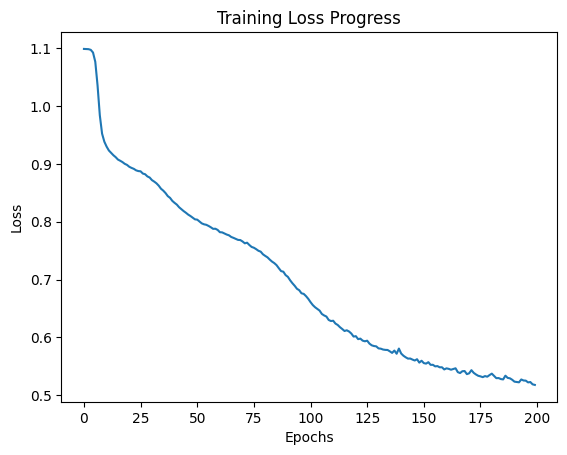

In [7]:
# Train the model
loss_values = train_model(model, train_loader, criterion, optimizer, device=device, num_epochs=200)

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Progress')
plt.show()


 Unseen dataset Accuracy: 0.7664


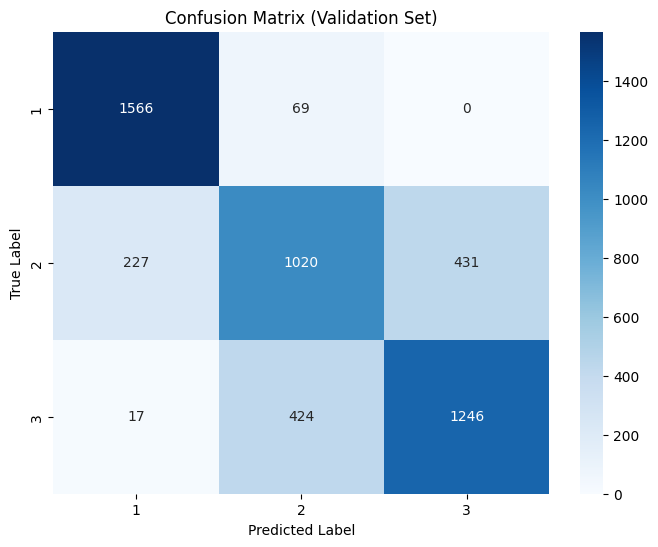

In [8]:
# Load the validation dataset
val_data = torch.load("Validation.pt", weights_only=False)

val_synthetic_data = val_data["synthetic_data"]         # shape: [N, 1024]
val_num_layers = val_data["num_layers"]                 # shape: [N]
val_num_layers_adjusted = val_num_layers - 1            # match training label indexing

# Unsqueeze to match model input shape
val_synthetic_data = val_synthetic_data.unsqueeze(1)    # shape: [N, 1, 1024]

# Create DataLoader for validation
val_dataset = TensorDataset(val_synthetic_data, val_num_layers_adjusted)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Set model to evaluation mode
model.eval()
all_preds = []
all_labels = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())   # move back to CPU before numpy
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix and accuracy
cm = confusion_matrix(all_labels, all_preds)
acc = accuracy_score(all_labels, all_preds)

print(f"\n Unseen dataset Accuracy: {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"{i+1}" for i in range(cm.shape[0])],
            yticklabels=[f"{i+1}" for i in range(cm.shape[0])])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

## Train and test Larger CNN

In [9]:
# Initialize the model, criterion, and optimizer
model = CNN1D_Large(input_channels=1, num_classes=num_classes).to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Optional: Print shapes and label stats for sanity check
print("Data shape:", synthetic_data.shape)
print("Label range:", num_layers_adjusted.min().item(), "to", num_layers_adjusted.max().item())
print("Number of classes:", num_classes)

Data shape: torch.Size([60000, 1, 1024])
Label range: 0 to 2
Number of classes: 3


Epoch 1/100: 100%|██████████| 59/59 [00:03<00:00, 15.48batch/s, loss=0.285]


Epoch [1/100], Loss: 0.2846


Epoch 2/100: 100%|██████████| 59/59 [00:03<00:00, 17.24batch/s, loss=0.301]


Epoch [2/100], Loss: 0.3006


Epoch 3/100: 100%|██████████| 59/59 [00:03<00:00, 16.67batch/s, loss=0.264]


Epoch [3/100], Loss: 0.2645


Epoch 4/100: 100%|██████████| 59/59 [00:03<00:00, 17.35batch/s, loss=0.256]


Epoch [4/100], Loss: 0.2565


Epoch 5/100: 100%|██████████| 59/59 [00:03<00:00, 16.51batch/s, loss=0.249]


Epoch [5/100], Loss: 0.2491


Epoch 6/100: 100%|██████████| 59/59 [00:03<00:00, 17.36batch/s, loss=0.243]


Epoch [6/100], Loss: 0.2434


Epoch 7/100: 100%|██████████| 59/59 [00:03<00:00, 16.53batch/s, loss=0.238]


Epoch [7/100], Loss: 0.2377


Epoch 8/100: 100%|██████████| 59/59 [00:03<00:00, 17.25batch/s, loss=0.233]


Epoch [8/100], Loss: 0.2331


Epoch 9/100: 100%|██████████| 59/59 [00:03<00:00, 16.57batch/s, loss=0.228]


Epoch [9/100], Loss: 0.2283


Epoch 10/100: 100%|██████████| 59/59 [00:03<00:00, 17.20batch/s, loss=0.225]


Epoch [10/100], Loss: 0.2246


Epoch 11/100: 100%|██████████| 59/59 [00:03<00:00, 16.45batch/s, loss=0.222]


Epoch [11/100], Loss: 0.2222


Epoch 12/100: 100%|██████████| 59/59 [00:03<00:00, 17.10batch/s, loss=0.221]


Epoch [12/100], Loss: 0.2211


Epoch 13/100: 100%|██████████| 59/59 [00:03<00:00, 16.38batch/s, loss=0.216]


Epoch [13/100], Loss: 0.2161


Epoch 14/100: 100%|██████████| 59/59 [00:03<00:00, 17.20batch/s, loss=0.212]


Epoch [14/100], Loss: 0.2115


Epoch 15/100: 100%|██████████| 59/59 [00:03<00:00, 16.44batch/s, loss=0.207]


Epoch [15/100], Loss: 0.2066


Epoch 16/100: 100%|██████████| 59/59 [00:03<00:00, 17.30batch/s, loss=0.199]


Epoch [16/100], Loss: 0.1989


Epoch 17/100: 100%|██████████| 59/59 [00:03<00:00, 17.13batch/s, loss=0.204]


Epoch [17/100], Loss: 0.2042


Epoch 18/100: 100%|██████████| 59/59 [00:03<00:00, 17.58batch/s, loss=0.199]


Epoch [18/100], Loss: 0.1992


Epoch 19/100: 100%|██████████| 59/59 [00:03<00:00, 16.68batch/s, loss=0.194]


Epoch [19/100], Loss: 0.1935


Epoch 20/100: 100%|██████████| 59/59 [00:03<00:00, 17.42batch/s, loss=0.193]


Epoch [20/100], Loss: 0.1926


Epoch 21/100: 100%|██████████| 59/59 [00:03<00:00, 16.76batch/s, loss=0.191]


Epoch [21/100], Loss: 0.1909


Epoch 22/100: 100%|██████████| 59/59 [00:03<00:00, 17.46batch/s, loss=0.186]


Epoch [22/100], Loss: 0.1861


Epoch 23/100: 100%|██████████| 59/59 [00:03<00:00, 16.59batch/s, loss=0.19] 


Epoch [23/100], Loss: 0.1900


Epoch 24/100: 100%|██████████| 59/59 [00:03<00:00, 17.31batch/s, loss=0.185]


Epoch [24/100], Loss: 0.1852


Epoch 25/100: 100%|██████████| 59/59 [00:03<00:00, 16.67batch/s, loss=0.188]


Epoch [25/100], Loss: 0.1883


Epoch 26/100: 100%|██████████| 59/59 [00:03<00:00, 17.53batch/s, loss=0.181]


Epoch [26/100], Loss: 0.1808


Epoch 27/100: 100%|██████████| 59/59 [00:03<00:00, 16.93batch/s, loss=0.174]


Epoch [27/100], Loss: 0.1741


Epoch 28/100: 100%|██████████| 59/59 [00:03<00:00, 17.63batch/s, loss=0.175]


Epoch [28/100], Loss: 0.1747


Epoch 29/100: 100%|██████████| 59/59 [00:03<00:00, 16.86batch/s, loss=0.176]


Epoch [29/100], Loss: 0.1758


Epoch 30/100: 100%|██████████| 59/59 [00:03<00:00, 17.53batch/s, loss=0.185]


Epoch [30/100], Loss: 0.1850


Epoch 31/100: 100%|██████████| 59/59 [00:03<00:00, 17.51batch/s, loss=0.179]


Epoch [31/100], Loss: 0.1793


Epoch 32/100: 100%|██████████| 59/59 [00:03<00:00, 16.83batch/s, loss=0.17] 


Epoch [32/100], Loss: 0.1701


Epoch 33/100: 100%|██████████| 59/59 [00:03<00:00, 17.58batch/s, loss=0.184]


Epoch [33/100], Loss: 0.1841


Epoch 34/100: 100%|██████████| 59/59 [00:03<00:00, 16.93batch/s, loss=0.177]


Epoch [34/100], Loss: 0.1766


Epoch 35/100: 100%|██████████| 59/59 [00:03<00:00, 17.54batch/s, loss=0.169]


Epoch [35/100], Loss: 0.1691


Epoch 36/100: 100%|██████████| 59/59 [00:03<00:00, 16.84batch/s, loss=0.166]


Epoch [36/100], Loss: 0.1656


Epoch 37/100: 100%|██████████| 59/59 [00:03<00:00, 17.54batch/s, loss=0.163]


Epoch [37/100], Loss: 0.1635


Epoch 38/100: 100%|██████████| 59/59 [00:03<00:00, 16.85batch/s, loss=0.163]


Epoch [38/100], Loss: 0.1631


Epoch 39/100: 100%|██████████| 59/59 [00:03<00:00, 17.60batch/s, loss=0.162]


Epoch [39/100], Loss: 0.1623


Epoch 40/100: 100%|██████████| 59/59 [00:03<00:00, 16.85batch/s, loss=0.167]


Epoch [40/100], Loss: 0.1669


Epoch 41/100: 100%|██████████| 59/59 [00:03<00:00, 17.64batch/s, loss=0.17] 


Epoch [41/100], Loss: 0.1699


Epoch 42/100: 100%|██████████| 59/59 [00:03<00:00, 16.81batch/s, loss=0.167]


Epoch [42/100], Loss: 0.1674


Epoch 43/100: 100%|██████████| 59/59 [00:03<00:00, 17.60batch/s, loss=0.171]


Epoch [43/100], Loss: 0.1710


Epoch 44/100: 100%|██████████| 59/59 [00:03<00:00, 16.78batch/s, loss=0.155]


Epoch [44/100], Loss: 0.1554


Epoch 45/100: 100%|██████████| 59/59 [00:03<00:00, 17.59batch/s, loss=0.163]


Epoch [45/100], Loss: 0.1633


Epoch 46/100: 100%|██████████| 59/59 [00:03<00:00, 16.92batch/s, loss=0.16] 


Epoch [46/100], Loss: 0.1602


Epoch 47/100: 100%|██████████| 59/59 [00:03<00:00, 17.59batch/s, loss=0.161]


Epoch [47/100], Loss: 0.1611


Epoch 48/100: 100%|██████████| 59/59 [00:03<00:00, 16.88batch/s, loss=0.152]


Epoch [48/100], Loss: 0.1517


Epoch 49/100: 100%|██████████| 59/59 [00:03<00:00, 17.60batch/s, loss=0.153]


Epoch [49/100], Loss: 0.1535


Epoch 50/100: 100%|██████████| 59/59 [00:03<00:00, 16.81batch/s, loss=0.226]


Epoch [50/100], Loss: 0.2262


Epoch 51/100: 100%|██████████| 59/59 [00:03<00:00, 17.53batch/s, loss=0.177]


Epoch [51/100], Loss: 0.1770


Epoch 52/100: 100%|██████████| 59/59 [00:03<00:00, 16.84batch/s, loss=0.166]


Epoch [52/100], Loss: 0.1660


Epoch 53/100: 100%|██████████| 59/59 [00:03<00:00, 17.59batch/s, loss=0.155]


Epoch [53/100], Loss: 0.1552


Epoch 54/100: 100%|██████████| 59/59 [00:03<00:00, 16.86batch/s, loss=0.152]


Epoch [54/100], Loss: 0.1524


Epoch 55/100: 100%|██████████| 59/59 [00:03<00:00, 17.51batch/s, loss=0.15] 


Epoch [55/100], Loss: 0.1504


Epoch 56/100: 100%|██████████| 59/59 [00:03<00:00, 16.80batch/s, loss=0.155]


Epoch [56/100], Loss: 0.1549


Epoch 57/100: 100%|██████████| 59/59 [00:03<00:00, 17.53batch/s, loss=0.148]


Epoch [57/100], Loss: 0.1477


Epoch 58/100: 100%|██████████| 59/59 [00:03<00:00, 16.86batch/s, loss=0.143]


Epoch [58/100], Loss: 0.1432


Epoch 59/100: 100%|██████████| 59/59 [00:03<00:00, 17.56batch/s, loss=0.143]


Epoch [59/100], Loss: 0.1431


Epoch 60/100: 100%|██████████| 59/59 [00:03<00:00, 16.89batch/s, loss=0.149]


Epoch [60/100], Loss: 0.1490


Epoch 61/100: 100%|██████████| 59/59 [00:03<00:00, 17.56batch/s, loss=0.147]


Epoch [61/100], Loss: 0.1466


Epoch 62/100: 100%|██████████| 59/59 [00:03<00:00, 16.80batch/s, loss=0.139]


Epoch [62/100], Loss: 0.1390


Epoch 63/100: 100%|██████████| 59/59 [00:03<00:00, 17.47batch/s, loss=0.145]


Epoch [63/100], Loss: 0.1452


Epoch 64/100: 100%|██████████| 59/59 [00:03<00:00, 17.54batch/s, loss=0.141]


Epoch [64/100], Loss: 0.1412


Epoch 65/100: 100%|██████████| 59/59 [00:03<00:00, 17.10batch/s, loss=0.146]


Epoch [65/100], Loss: 0.1462


Epoch 66/100: 100%|██████████| 59/59 [00:03<00:00, 17.60batch/s, loss=0.137]


Epoch [66/100], Loss: 0.1371


Epoch 67/100: 100%|██████████| 59/59 [00:03<00:00, 16.82batch/s, loss=0.155]


Epoch [67/100], Loss: 0.1546


Epoch 68/100: 100%|██████████| 59/59 [00:03<00:00, 17.48batch/s, loss=0.153]


Epoch [68/100], Loss: 0.1532


Epoch 69/100: 100%|██████████| 59/59 [00:03<00:00, 16.81batch/s, loss=0.142]


Epoch [69/100], Loss: 0.1415


Epoch 70/100: 100%|██████████| 59/59 [00:03<00:00, 17.46batch/s, loss=0.141]


Epoch [70/100], Loss: 0.1407


Epoch 71/100: 100%|██████████| 59/59 [00:03<00:00, 16.64batch/s, loss=0.14] 


Epoch [71/100], Loss: 0.1396


Epoch 72/100: 100%|██████████| 59/59 [00:03<00:00, 17.05batch/s, loss=0.137]


Epoch [72/100], Loss: 0.1371


Epoch 73/100: 100%|██████████| 59/59 [00:03<00:00, 16.42batch/s, loss=0.138]


Epoch [73/100], Loss: 0.1384


Epoch 74/100: 100%|██████████| 59/59 [00:03<00:00, 16.99batch/s, loss=0.131]


Epoch [74/100], Loss: 0.1307


Epoch 75/100: 100%|██████████| 59/59 [00:03<00:00, 16.39batch/s, loss=0.135]


Epoch [75/100], Loss: 0.1347


Epoch 76/100: 100%|██████████| 59/59 [00:03<00:00, 17.00batch/s, loss=0.135]


Epoch [76/100], Loss: 0.1354


Epoch 77/100: 100%|██████████| 59/59 [00:03<00:00, 16.38batch/s, loss=0.13] 


Epoch [77/100], Loss: 0.1296


Epoch 78/100: 100%|██████████| 59/59 [00:03<00:00, 17.09batch/s, loss=0.132]


Epoch [78/100], Loss: 0.1321


Epoch 79/100: 100%|██████████| 59/59 [00:03<00:00, 16.53batch/s, loss=0.135]


Epoch [79/100], Loss: 0.1346


Epoch 80/100: 100%|██████████| 59/59 [00:03<00:00, 17.01batch/s, loss=0.143]


Epoch [80/100], Loss: 0.1429


Epoch 81/100: 100%|██████████| 59/59 [00:03<00:00, 16.35batch/s, loss=0.135]


Epoch [81/100], Loss: 0.1351


Epoch 82/100: 100%|██████████| 59/59 [00:03<00:00, 16.96batch/s, loss=0.13] 


Epoch [82/100], Loss: 0.1300


Epoch 83/100: 100%|██████████| 59/59 [00:03<00:00, 16.30batch/s, loss=0.129]


Epoch [83/100], Loss: 0.1292


Epoch 84/100: 100%|██████████| 59/59 [00:03<00:00, 16.92batch/s, loss=0.125]


Epoch [84/100], Loss: 0.1254


Epoch 85/100: 100%|██████████| 59/59 [00:03<00:00, 16.14batch/s, loss=0.127]


Epoch [85/100], Loss: 0.1275


Epoch 86/100: 100%|██████████| 59/59 [00:03<00:00, 16.88batch/s, loss=0.131]


Epoch [86/100], Loss: 0.1314


Epoch 87/100: 100%|██████████| 59/59 [00:03<00:00, 16.15batch/s, loss=0.126]


Epoch [87/100], Loss: 0.1260


Epoch 88/100: 100%|██████████| 59/59 [00:03<00:00, 16.88batch/s, loss=0.13] 


Epoch [88/100], Loss: 0.1300


Epoch 89/100: 100%|██████████| 59/59 [00:03<00:00, 16.29batch/s, loss=0.126]


Epoch [89/100], Loss: 0.1262


Epoch 90/100: 100%|██████████| 59/59 [00:03<00:00, 17.10batch/s, loss=0.126]


Epoch [90/100], Loss: 0.1256


Epoch 91/100: 100%|██████████| 59/59 [00:03<00:00, 16.41batch/s, loss=0.123]


Epoch [91/100], Loss: 0.1230


Epoch 92/100: 100%|██████████| 59/59 [00:03<00:00, 17.14batch/s, loss=0.126]


Epoch [92/100], Loss: 0.1255


Epoch 93/100: 100%|██████████| 59/59 [00:03<00:00, 16.29batch/s, loss=0.124]


Epoch [93/100], Loss: 0.1242


Epoch 94/100: 100%|██████████| 59/59 [00:03<00:00, 16.94batch/s, loss=0.122]


Epoch [94/100], Loss: 0.1219


Epoch 95/100: 100%|██████████| 59/59 [00:03<00:00, 16.30batch/s, loss=0.125]


Epoch [95/100], Loss: 0.1252


Epoch 96/100: 100%|██████████| 59/59 [00:03<00:00, 17.09batch/s, loss=0.136]


Epoch [96/100], Loss: 0.1359


Epoch 97/100: 100%|██████████| 59/59 [00:03<00:00, 16.46batch/s, loss=0.126]


Epoch [97/100], Loss: 0.1259


Epoch 98/100: 100%|██████████| 59/59 [00:03<00:00, 17.10batch/s, loss=0.126]


Epoch [98/100], Loss: 0.1259


Epoch 99/100: 100%|██████████| 59/59 [00:03<00:00, 16.99batch/s, loss=0.12] 


Epoch [99/100], Loss: 0.1203


Epoch 100/100: 100%|██████████| 59/59 [00:03<00:00, 16.28batch/s, loss=0.122]


Epoch [100/100], Loss: 0.1217


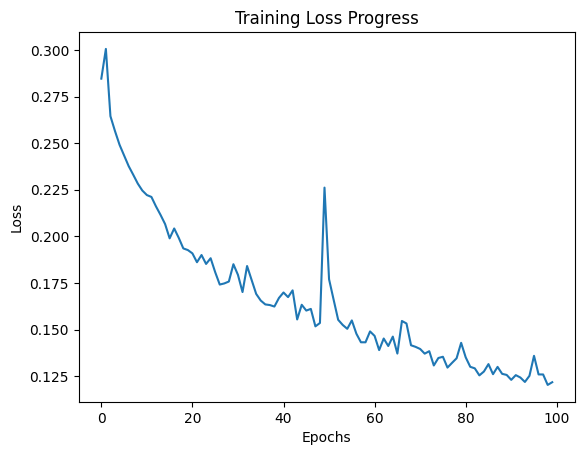

In [12]:
# Train the model
loss_values = train_model(model, train_loader, criterion, optimizer, device=device, num_epochs=100)

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Progress')
plt.show()


Unseen Accuracy: 0.3608


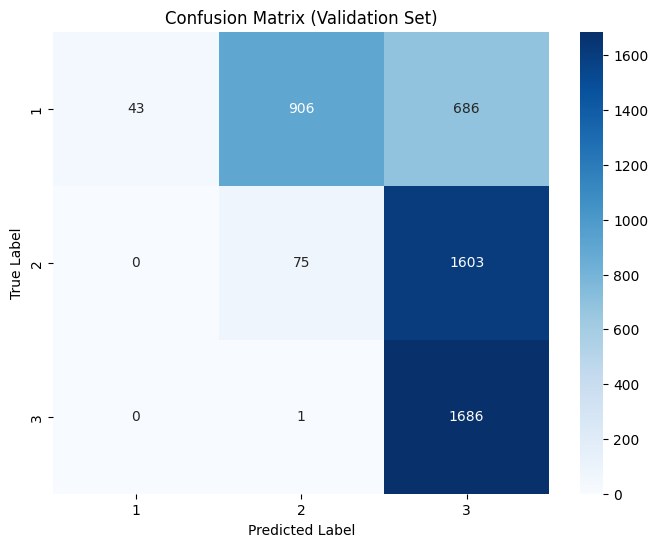

In [13]:
# Load the validation dataset
val_data = torch.load("Validation.pt", weights_only=False)

val_synthetic_data = val_data["synthetic_data"]         # shape: [N, 1024]
val_num_layers = val_data["num_layers"]                 # shape: [N]
val_num_layers_adjusted = val_num_layers - 1            # match training label indexing

# Unsqueeze to match model input shape
val_synthetic_data = val_synthetic_data.unsqueeze(1)    # shape: [N, 1, 1024]

# Create DataLoader for validation
val_dataset = TensorDataset(val_synthetic_data, val_num_layers_adjusted)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Set model to evaluation mode
model.eval()
all_preds = []
all_labels = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())   # move back to CPU before numpy
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix and accuracy
cm = confusion_matrix(all_labels, all_preds)
acc = accuracy_score(all_labels, all_preds)

print(f"\nUnseen Accuracy: {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"{i+1}" for i in range(cm.shape[0])],
            yticklabels=[f"{i+1}" for i in range(cm.shape[0])])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()